In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
raw_data = pd.read_csv("Fraud_check.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
raw_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
raw_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
raw_data.describe(include=np.object)

<ipython-input-6-8294db1d5997>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_data.describe(include=np.object)


,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [ ]:
raw_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
raw_data.duplicated().sum()

0

In [ ]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [ ]:
data=raw_data.copy()
data['Income_cat'] = pd.cut(x = raw_data['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


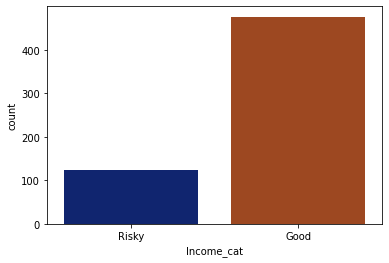

In [ ]:
sns.countplot(data=data, x='Income_cat', palette = "dark")

In [ ]:
data.drop('Taxable.Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'Income_cat'], dtype='object')

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income_cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [ ]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]
data.shape, X.shape, Y.shape

((600, 6), (600, 5), (600, 1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

In [ ]:
dt_clf_1 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='random')
dt_clf_1 = dt_clf_1.fit(X_train,Y_train)
Y_pred_1 = dt_clf_1.predict(X_test)
Y_pred_train_1 = dt_clf_1.predict(X_train)

In [ ]:
print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_1))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_1))
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy_train: 0.8095238095238095
Accuracy_test: 0.7666666666666667
[[138   5]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       143
           1       0.00      0.00      0.00        37

    accuracy                           0.77       180
   macro avg       0.39      0.48      0.43       180
weighted avg       0.63      0.77      0.69       180



In [ ]:
dt_clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='best')
dt_clf_2 = dt_clf_2.fit(X_train,Y_train)
Y_pred_2 = dt_clf_2.predict(X_test)
Y_pred_train_2 = dt_clf_2.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_2))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_2))
print(confusion_matrix(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

Accuracy_train: 0.8285714285714286
Accuracy_test: 0.7722222222222223
[[138   5]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       143
           1       0.17      0.03      0.05        37

    accuracy                           0.77       180
   macro avg       0.48      0.50      0.46       180
weighted avg       0.66      0.77      0.70       180



In [ ]:
dt_clf_3 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='best')
dt_clf_3 = dt_clf_3.fit(X_train,Y_train)
Y_pred_3 = dt_clf_3.predict(X_test)
Y_pred_train_3 = dt_clf_3.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_3))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_3))
print(confusion_matrix(Y_test, Y_pred_3))
print(classification_report(Y_test, Y_pred_3))

Accuracy_train: 0.8357142857142857
Accuracy_test: 0.7666666666666667
[[137   6]
 [ 36   1]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       143
           1       0.14      0.03      0.05        37

    accuracy                           0.77       180
   macro avg       0.47      0.49      0.46       180
weighted avg       0.66      0.77      0.70       180



In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(Y_train)
print('Before',counter)

smt = SMOTE(random_state=7)
X_train_smt, Y_train_smt = smt.fit_resample(X_train, Y_train)

counter = Counter(Y_train_smt)
print('After',counter)

Before Counter({'Income_cat': 1})
After Counter({'Income_cat': 1})


In [ ]:
X_train.shape, Y_train.shape, X_train_smt.shape, Y_train_smt.shape

((420, 5), (420, 1), (666, 5), (666, 1))

In [ ]:
Y_train.value_counts(), Y_train_smt.value_counts()

(Income_cat
 0             333
 1              87
 dtype: int64, Income_cat
 0             333
 1             333
 dtype: int64)

In [ ]:
dt_clf_4 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter='best')
dt_clf_4 = dt_clf_4.fit(X_train_smt,Y_train_smt)
Y_pred_4 = dt_clf_4.predict(X_test)
Y_pred_train_4 = dt_clf_4.predict(X_train_smt)

print("Accuracy_train:",metrics.accuracy_score(Y_train_smt, Y_pred_train_4))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_4))
print(confusion_matrix(Y_test, Y_pred_4))
print(classification_report(Y_test, Y_pred_4))

Accuracy_train: 0.7717717717717718
Accuracy_test: 0.5722222222222222
[[92 51]
 [26 11]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       143
           1       0.18      0.30      0.22        37

    accuracy                           0.57       180
   macro avg       0.48      0.47      0.46       180
weighted avg       0.66      0.57      0.61       180



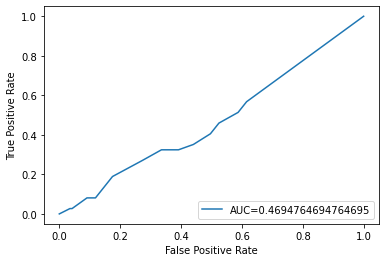

In [ ]:
Y_pred_proba = dt_clf_3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

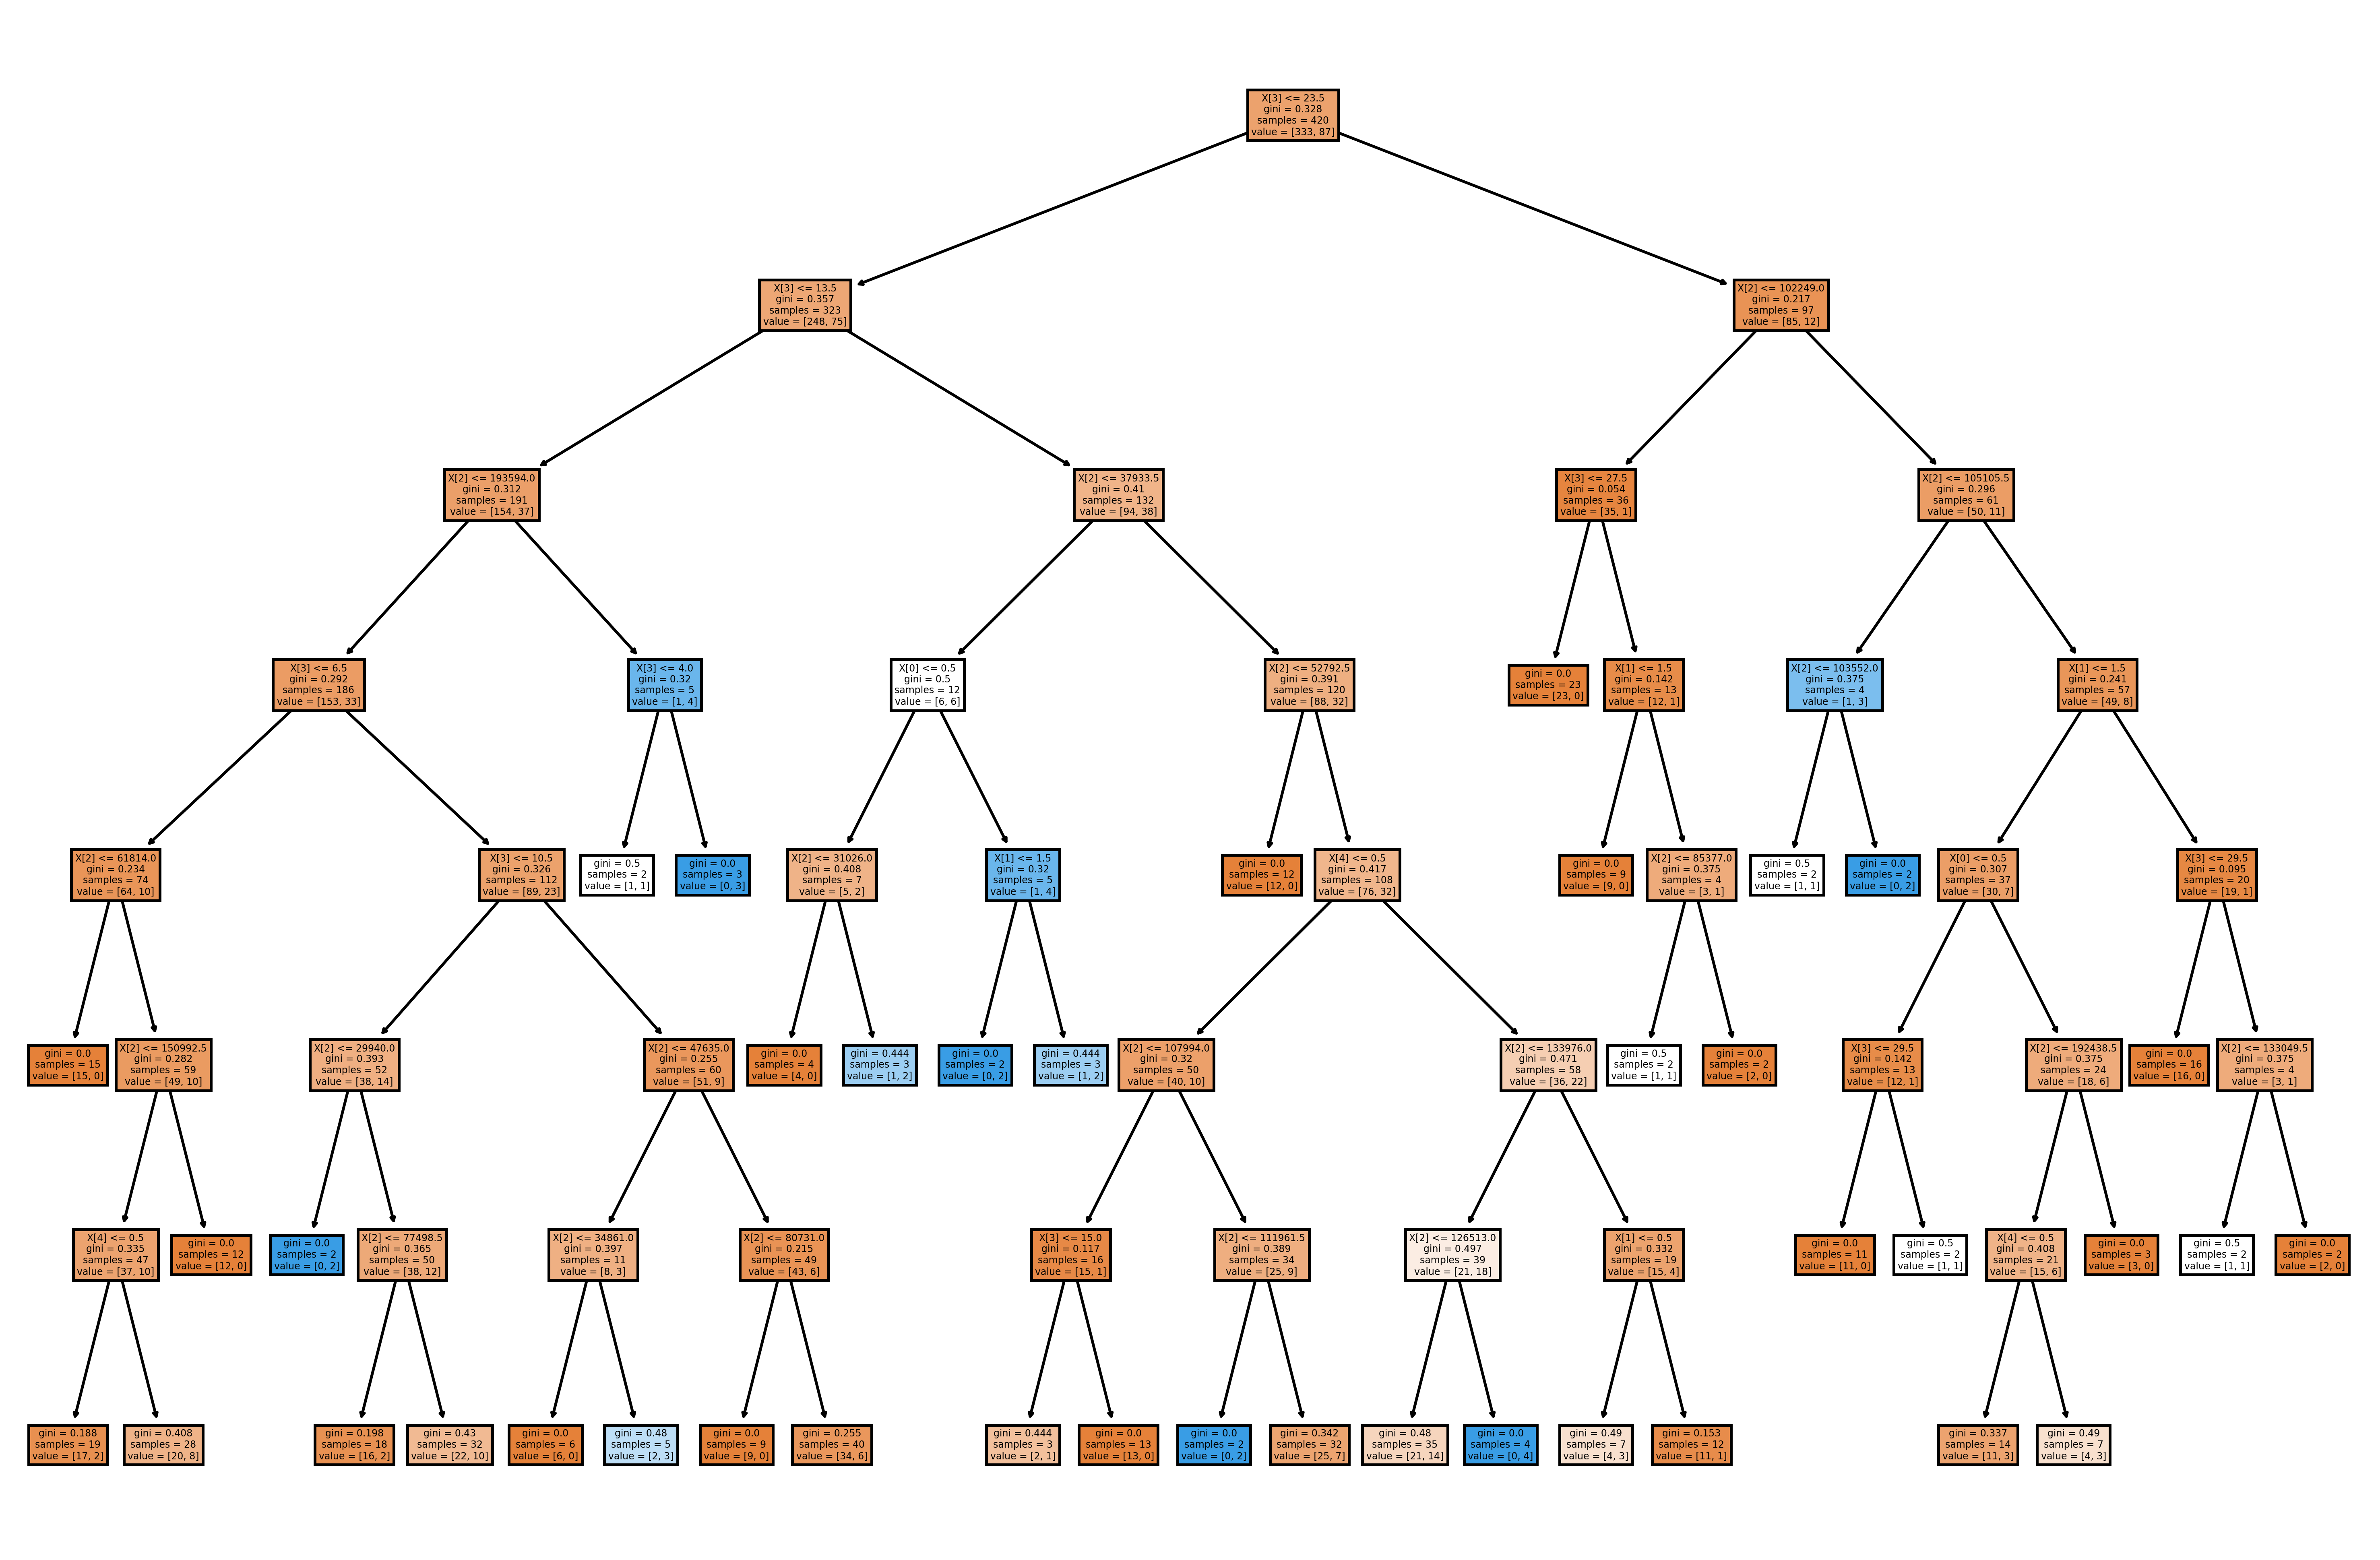

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(dt_clf_3,filled=True)
plt.show()

In [ ]:
def plot_roc_curve(y_test, y_test_score):
  # “””Plot ROC curve for testing data”””
 
 fpr, tpr, _ = roc_curve(y_test, y_test_score)
 roc_auc = auc(fpr, tpr)
 plt.figure()
 plt.plot(fpr, tpr, label=”ROC curve (area = %0.2f)” % roc_auc)
 plt.plot([0, 1], [0, 1], “k — “)
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel(“False Positive Rate”)
 plt.ylabel(“True Positive Rate”)
 plt.title(“Receiver operating characteristic”)
 plt.legend(loc=”lower right”)
 plt.show()